In [25]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df=pd.read_csv(r"C:\Users\SHAKIL\titanic\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [27]:
df.shape

(891, 12)

In [28]:
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [29]:
df['Parch'].describe()
df[df['Parch']==0].count()

PassengerId    678
Survived       678
Pclass         678
Name           678
Sex            678
Age            521
SibSp          678
Parch          678
Ticket         678
Fare           678
Cabin          141
Embarked       676
dtype: int64

In [30]:
df2=df.drop(['PassengerId','Survived','Pclass','Name','Ticket','Fare','Cabin','Embarked'],axis='columns')

In [31]:
df2.head()

,Sex,Age,SibSp,Parch
0,male,22.0,1,0
1,female,38.0,1,0
2,female,26.0,0,0
3,female,35.0,1,0
4,male,35.0,0,0


In [32]:
np.max(df2['Age'])

80.0

In [33]:
df2[df2['Age']==80]

,Sex,Age,SibSp,Parch
630,male,80.0,0,0


In [34]:
#Normalizing Age 
df2['Age']=df2['Age']/80

In [35]:
df2.head()

,Sex,Age,SibSp,Parch
0,male,0.2750,1,0
1,female,0.4750,1,0
2,female,0.3250,0,0
3,female,0.4375,1,0
4,male,0.4375,0,0


In [36]:
## Get Dummie variables for Sex Column
dummies=pd.get_dummies(df2['Sex'])

In [37]:
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [38]:
## Concating dummie variables with original dataset
df3=pd.concat([df2,dummies],axis='columns')
df3.head()

,Sex,Age,SibSp,Parch,female,male
0,male,0.2750,1,0,0,1
1,female,0.4750,1,0,1,0
2,female,0.3250,0,0,1,0
3,female,0.4375,1,0,1,0
4,male,0.4375,0,0,0,1


In [39]:
## Excluding original sex column along with one dummie column
df4=df3.drop(['Sex','male'],axis='columns')
df4.head()

,Age,SibSp,Parch,female
0,0.2750,1,0,0
1,0.4750,1,0,1
2,0.3250,0,0,1
3,0.4375,1,0,1
4,0.4375,0,0,0


In [40]:
df4.isnull().sum()

Age       177
SibSp       0
Parch       0
female      0
dtype: int64

In [41]:
New_age=df4['Age'].fillna(df4['Age'].mean())

In [42]:
df4.isnull().sum()

Age       177
SibSp       0
Parch       0
female      0
dtype: int64

In [43]:
df5=pd.concat([df4,New_age],axis='columns')
df5.head()

,Age,SibSp,Parch,female,Age
0,0.2750,1,0,0,0.2750
1,0.4750,1,0,1,0.4750
2,0.3250,0,0,1,0.3250
3,0.4375,1,0,1,0.4375
4,0.4375,0,0,0,0.4375


In [44]:
df6=df5.drop(['Age'],axis='columns')
df6=pd.concat([df6,New_age],axis='columns')
df6.head()

,SibSp,Parch,female,Age
0,1,0,0,0.2750
1,1,0,1,0.4750
2,0,0,1,0.3250
3,1,0,1,0.4375
4,0,0,0,0.4375


In [45]:
df6.isnull().sum()

SibSp     0
Parch     0
female    0
Age       0
dtype: int64

In [46]:
x=df6
y=df['Survived']

In [47]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()


In [48]:
model.fit(x,y)

C:\Users\SHAKIL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
model.score(x,y)

0.7912457912457912

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2)

In [51]:
model.fit(x_train,y_train)

C:\Users\SHAKIL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
model.score(x_test,y_test)

0.7318435754189944

In [53]:
from sklearn import tree
model2= tree.DecisionTreeClassifier()

In [54]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [55]:
model.score(x_test,y_test)

0.7318435754189944

In [56]:
from sklearn.svm import SVC
model3=SVC()

In [57]:
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

C:\Users\SHAKIL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7486033519553073

In [58]:
from sklearn.naive_bayes import GaussianNB
model4= GaussianNB()

In [59]:
model4.fit(x_train,y_train)
model4.score(x_test,y_test)

0.7597765363128491

In [60]:
import tensorflow as tf
from tensorflow import keras

In [61]:
x_test.shape

(179, 4)

In [62]:
x_train.shape

(712, 4)

In [63]:
x_train_flatten=x_train.values.reshape(len(x_train),4)
x_test_flatten=x_test.values.reshape(len(x_test),4)

In [64]:
x_test_flatten.shape

(179, 4)

In [65]:
model5=keras.Sequential([
    keras.layers.Dense(4,input_shape=(4,),activation='sigmoid'),
    keras.layers.Dense(3,activation='sigmoid'),
    keras.layers.Dense(3,activation='sigmoid'),
    keras.layers.Dense(2,activation='sigmoid'),
    keras.layers.Dense(2,activation='sigmoid')
    
])
model5.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model5.fit(x_train_flatten,y_train,epochs=500)

Epoch 1/500
23/23 [==============================] - 3s 3ms/step - loss: 0.6785 - accuracy: 0.6389
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7104 - accuracy: 0.5957
Epoch 3/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6656 - accuracy: 0.6359
Epoch 4/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6127
Epoch 5/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6535 - accuracy: 0.6434
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.6208
Epoch 7/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6645 - accuracy: 0.6234
Epoch 8/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6590 - accuracy: 0.6308
Epoch 9/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6616 - accuracy: 0.6259
Epoch 10/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.6043
Epoch 11/

23/23 [==============================] - 0s 1ms/step - loss: 0.5763 - accuracy: 0.6379
Epoch 83/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5740 - accuracy: 0.6212
Epoch 84/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5833 - accuracy: 0.6018
Epoch 85/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5526 - accuracy: 0.6586
Epoch 86/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5678 - accuracy: 0.6183
Epoch 87/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5728 - accuracy: 0.6083
Epoch 88/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5383 - accuracy: 0.6703
Epoch 89/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5521 - accuracy: 0.6622
Epoch 90/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5363 - accuracy: 0.7828
Epoch 91/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5371 - accuracy: 0.8228
Epoch 92/500


23/23 [==============================] - 0s 1ms/step - loss: 0.4998 - accuracy: 0.7927
Epoch 164/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4925 - accuracy: 0.7940
Epoch 165/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.8160
Epoch 166/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4782 - accuracy: 0.8112
Epoch 167/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4851 - accuracy: 0.8015
Epoch 168/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4657 - accuracy: 0.8200
Epoch 169/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5054 - accuracy: 0.7903
Epoch 170/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4509 - accuracy: 0.8280
Epoch 171/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4689 - accuracy: 0.8172
Epoch 172/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4811 - accuracy: 0.8085
Epoc

23/23 [==============================] - 0s 2ms/step - loss: 0.4658 - accuracy: 0.8116
Epoch 244/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4791 - accuracy: 0.8018
Epoch 245/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4713 - accuracy: 0.8129
Epoch 246/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4724 - accuracy: 0.8154
Epoch 247/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4624 - accuracy: 0.8193
Epoch 248/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4569 - accuracy: 0.8176
Epoch 249/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4764 - accuracy: 0.8114
Epoch 250/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.8272
Epoch 251/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4712 - accuracy: 0.8086
Epoch 252/500
23/23 [==============================] - ETA: 0s - loss: 0.5496 - accuracy: 0.81 - 0s 1ms/s

23/23 [==============================] - 0s 1ms/step - loss: 0.4786 - accuracy: 0.8160
Epoch 324/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.8080
Epoch 325/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4447 - accuracy: 0.8300
Epoch 326/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4423 - accuracy: 0.8313
Epoch 327/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4716 - accuracy: 0.8226
Epoch 328/500
23/23 [==============================] - ETA: 0s - loss: 0.4424 - accuracy: 0.84 - 0s 1ms/step - loss: 0.4676 - accuracy: 0.8173
Epoch 329/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4502 - accuracy: 0.8373
Epoch 330/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4565 - accuracy: 0.8236
Epoch 331/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4354 - accuracy: 0.8411
Epoch 332/500
23/23 [==============================] - 0s 1ms/s

23/23 [==============================] - 0s 1ms/step - loss: 0.4525 - accuracy: 0.8311
Epoch 404/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4461 - accuracy: 0.8315
Epoch 405/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4390 - accuracy: 0.8381
Epoch 406/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4450 - accuracy: 0.8405
Epoch 407/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4758 - accuracy: 0.8149
Epoch 408/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.8262
Epoch 409/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4489 - accuracy: 0.8285
Epoch 410/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4459 - accuracy: 0.8286
Epoch 411/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4562 - accuracy: 0.8274
Epoch 412/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4393 - accuracy: 0.8469
Epoc

23/23 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.8172
Epoch 483/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.8428
Epoch 484/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4856 - accuracy: 0.8151
Epoch 485/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4988 - accuracy: 0.7999
Epoch 486/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.8052
Epoch 487/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4751 - accuracy: 0.8142
Epoch 488/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4608 - accuracy: 0.8216
Epoch 489/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4555 - accuracy: 0.8282
Epoch 490/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4449 - accuracy: 0.8333
Epoch 491/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.8217
Epoc

In [66]:
model5.evaluate(x_test_flatten,y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.5466 - accuracy: 0.7709


[0.5466354489326477, 0.7709497213363647]

In [67]:
prediction= model5.predict(x_test_flatten)

In [68]:
prediction[1]

array([0.76603824, 0.34076905], dtype=float32)

In [69]:
y_predic=[np.argmax(i) for i in prediction]

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predic)
cm

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[90, 15],
       [26, 48]])>

Text(24.0, 0.5, 'Truth')

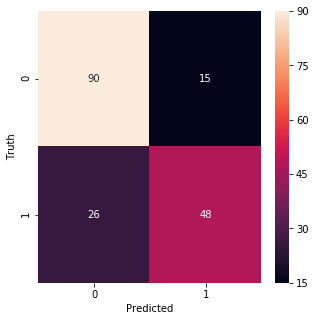

In [139]:
import seaborn as sn
plt.figure(figsize = (5,5))
ax=sn.heatmap(cm, annot=True)

bottom, top=ax.get_ylim()
ax.set_ylim(bottom+.5,top-.5)

plt.xlabel('Predicted')
plt.ylabel('Truth')

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [74]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train_flatten, y_train)
pipe.score(x_test_flatten, y_test)

print(classification_report(y_test, pipe.predict(x_test_flatten)))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       105
           1       0.80      0.66      0.73        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



In [78]:
test_data=pd.read_csv(r"C:\Users\SHAKIL\titanic\test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
test_data=test_data.drop(['PassengerId','Pclass','Name','Ticket','Fare','Cabin','Embarked'],axis='columns')
test_data.head()

,Sex,Age,SibSp,Parch
0,male,34.5,0,0
1,female,47.0,1,0
2,male,62.0,0,0
3,male,27.0,0,0
4,female,22.0,1,1


In [80]:
dummies2=pd.get_dummies(test_data['Sex'])
test=pd.concat([test_data,dummies2],axis='columns')
test=test.drop(['Sex','male'],axis='columns')
test.head()

,Age,SibSp,Parch,female
0,34.5,0,0,0
1,47.0,1,0,1
2,62.0,0,0,0
3,27.0,0,0,0
4,22.0,1,1,1


In [81]:
test.isnull().sum()

Age       86
SibSp      0
Parch      0
female     0
dtype: int64

In [82]:
np.max(test['Age'])

76.0

In [83]:
Age=test['Age'].fillna(test['Age'].mean())
test=test.drop(['Age'],axis='columns')
test=pd.concat([test,Age],axis='columns')
test['Age']=test['Age']/76
test.head()

,SibSp,Parch,female,Age
0,0,0,0,0.453947
1,1,0,1,0.618421
2,0,0,0,0.815789
3,0,0,0,0.355263
4,1,1,1,0.289474


In [94]:
model5.predict([[1,0,1,0.618421]])

array([[0.34845126, 0.6566207 ]], dtype=float32)

In [96]:
np.argmax(model5.predict([[1,0,1,0.618421]]))

1

In [85]:
test.isnull().sum()

SibSp     0
Parch     0
female    0
Age       0
dtype: int64

In [86]:
## Removing feature using correlation

df=pd.read_csv(r"C:\Users\SHAKIL\titanic\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [87]:
X = df.drop("Survived",axis=1)   #Feature Matrix
y = df["Survived"]

In [88]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((623, 11), (268, 11))

In [89]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


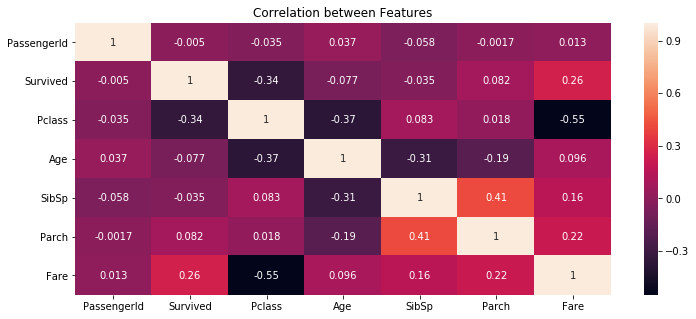

In [138]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(12,5))
cor = df.corr()
ax=sns.heatmap(cor, annot=True)
bottom, top=ax.get_ylim()
ax.set_ylim(bottom+.5,top-.5)
plt.title("Correlation between Features")
plt.show()

In [91]:

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [92]:
corr_features = correlation(df, 0.7)
len(set(corr_features))

0

In [93]:
corr_features

set()

In [97]:
# excluding sibsp from final dataset
df6.head()

,SibSp,Parch,female,Age
0,1,0,0,0.2750
1,1,0,1,0.4750
2,0,0,1,0.3250
3,1,0,1,0.4375
4,0,0,0,0.4375


In [98]:
df7=df6.drop(['SibSp'],axis=1)
df7.head()

,Parch,female,Age
0,0,0,0.2750
1,0,1,0.4750
2,0,1,0.3250
3,0,1,0.4375
4,0,0,0.4375


In [99]:
x=df7
y=df['Survived']

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.2)
x_train.shape

(712, 3)

In [102]:
x_train_flatten=x_train.values.reshape(len(x_train),3)
x_test_flatten=x_test.values.reshape(len(x_test),3)

In [103]:
model6=keras.Sequential([
    keras.layers.Dense(4,input_shape=(3,),activation='sigmoid'),
    keras.layers.Dense(3,activation='sigmoid'),
    keras.layers.Dense(3,activation='sigmoid'),
    keras.layers.Dense(2,activation='sigmoid'),
    keras.layers.Dense(2,activation='sigmoid')
    
])
model6.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
              )
model6.fit(x_train_flatten,y_train,epochs=500)

Epoch 1/500
23/23 [==============================] - 1s 2ms/step - loss: 0.6842 - accuracy: 0.6388
Epoch 2/500
23/23 [==============================] - 0s 2ms/step - loss: 0.7003 - accuracy: 0.6108
Epoch 3/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6368
Epoch 4/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.6192
Epoch 5/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.6255
Epoch 6/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.6455
Epoch 7/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6556 - accuracy: 0.6374
Epoch 8/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6712 - accuracy: 0.6105
Epoch 9/500
23/23 [==============================] - 0s 1ms/step - loss: 0.6756 - accuracy: 0.6010
Epoch 10/500
23/23 [==============================] - 0s 2ms/step - loss: 0.6689 - accuracy: 0.6121
Epoch 11/

23/23 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.7113
Epoch 84/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5780 - accuracy: 0.7668
Epoch 85/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5836 - accuracy: 0.7765
Epoch 86/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5680 - accuracy: 0.7880
Epoch 87/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5694 - accuracy: 0.7779
Epoch 88/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5521 - accuracy: 0.7820
Epoch 89/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5581 - accuracy: 0.7716
Epoch 90/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5527 - accuracy: 0.7810
Epoch 91/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5654 - accuracy: 0.7657
Epoch 92/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5443 - accuracy: 0.7820
Epoch 93/500


23/23 [==============================] - 0s 1ms/step - loss: 0.5428 - accuracy: 0.7561
Epoch 165/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5390 - accuracy: 0.7562
Epoch 166/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4974 - accuracy: 0.7879
Epoch 167/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4967 - accuracy: 0.7922
Epoch 168/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.7931
Epoch 169/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4962 - accuracy: 0.7955
Epoch 170/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7811
Epoch 171/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5037 - accuracy: 0.7864
Epoch 172/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5132 - accuracy: 0.7790
Epoch 173/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7863
Epoc

23/23 [==============================] - 0s 1ms/step - loss: 0.4968 - accuracy: 0.7844
Epoch 246/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.7757
Epoch 247/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5347 - accuracy: 0.7696
Epoch 248/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5166 - accuracy: 0.7802
Epoch 249/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5111 - accuracy: 0.7815
Epoch 250/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.7858
Epoch 251/500
23/23 [==============================] - ETA: 0s - loss: 0.4151 - accuracy: 0.87 - 0s 1ms/step - loss: 0.5027 - accuracy: 0.7897
Epoch 252/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5284 - accuracy: 0.7706
Epoch 253/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4900 - accuracy: 0.7963
Epoch 254/500
23/23 [==============================] - 0s 1ms/s

23/23 [==============================] - 0s 1ms/step - loss: 0.5106 - accuracy: 0.7804
Epoch 326/500
23/23 [==============================] - 0s 2ms/step - loss: 0.4771 - accuracy: 0.8102
Epoch 327/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4978 - accuracy: 0.7969
Epoch 328/500
23/23 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.7922
Epoch 329/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4696 - accuracy: 0.8117
Epoch 330/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4910 - accuracy: 0.8046
Epoch 331/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5229 - accuracy: 0.7753
Epoch 332/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5224 - accuracy: 0.7723
Epoch 333/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4725 - accuracy: 0.8143
Epoch 334/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5064 - accuracy: 0.7910
Epoc

23/23 [==============================] - 0s 1ms/step - loss: 0.5276 - accuracy: 0.7752
Epoch 406/500
23/23 [==============================] - 0s 2ms/step - loss: 0.4930 - accuracy: 0.7987
Epoch 407/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5234 - accuracy: 0.7785
Epoch 408/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5324 - accuracy: 0.7716
Epoch 409/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5201 - accuracy: 0.7827
Epoch 410/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5162 - accuracy: 0.7935
Epoch 411/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5142 - accuracy: 0.7902
Epoch 412/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5032 - accuracy: 0.7917
Epoch 413/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5205 - accuracy: 0.7862
Epoch 414/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4596 - accuracy: 0.8255
Epoc

23/23 [==============================] - 0s 2ms/step - loss: 0.5266 - accuracy: 0.7777
Epoch 487/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5224 - accuracy: 0.7855
Epoch 488/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.8135
Epoch 489/500
23/23 [==============================] - 0s 2ms/step - loss: 0.4749 - accuracy: 0.8158
Epoch 490/500
23/23 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.8199
Epoch 491/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.7997
Epoch 492/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4738 - accuracy: 0.8197
Epoch 493/500
23/23 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.7936
Epoch 494/500
23/23 [==============================] - 0s 1ms/step - loss: 0.5178 - accuracy: 0.7866
Epoch 495/500
23/23 [==============================] - 0s 1ms/step - loss: 0.4964 - accuracy: 0.8040
Epoc

In [105]:
model6.evaluate(x_test_flatten,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7877


[0.4921438992023468, 0.7877094745635986]

In [106]:
model.fit(x_train,y_train)

C:\Users\SHAKIL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [107]:
model.score(x_test,y_test)

0.8100558659217877

In [118]:
models=[model,model2,model3,model4]
for i in models:
    i.fit(x_train,y_train)
    print("for {}, Accuracy is {} %".format(i, i.score(x_test,y_test)*100))

for LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False), Accuracy is 81.00558659217877 %
for DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'), Accuracy is 76.53631284916202 %
for SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=No

C:\Users\SHAKIL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\SHAKIL\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
